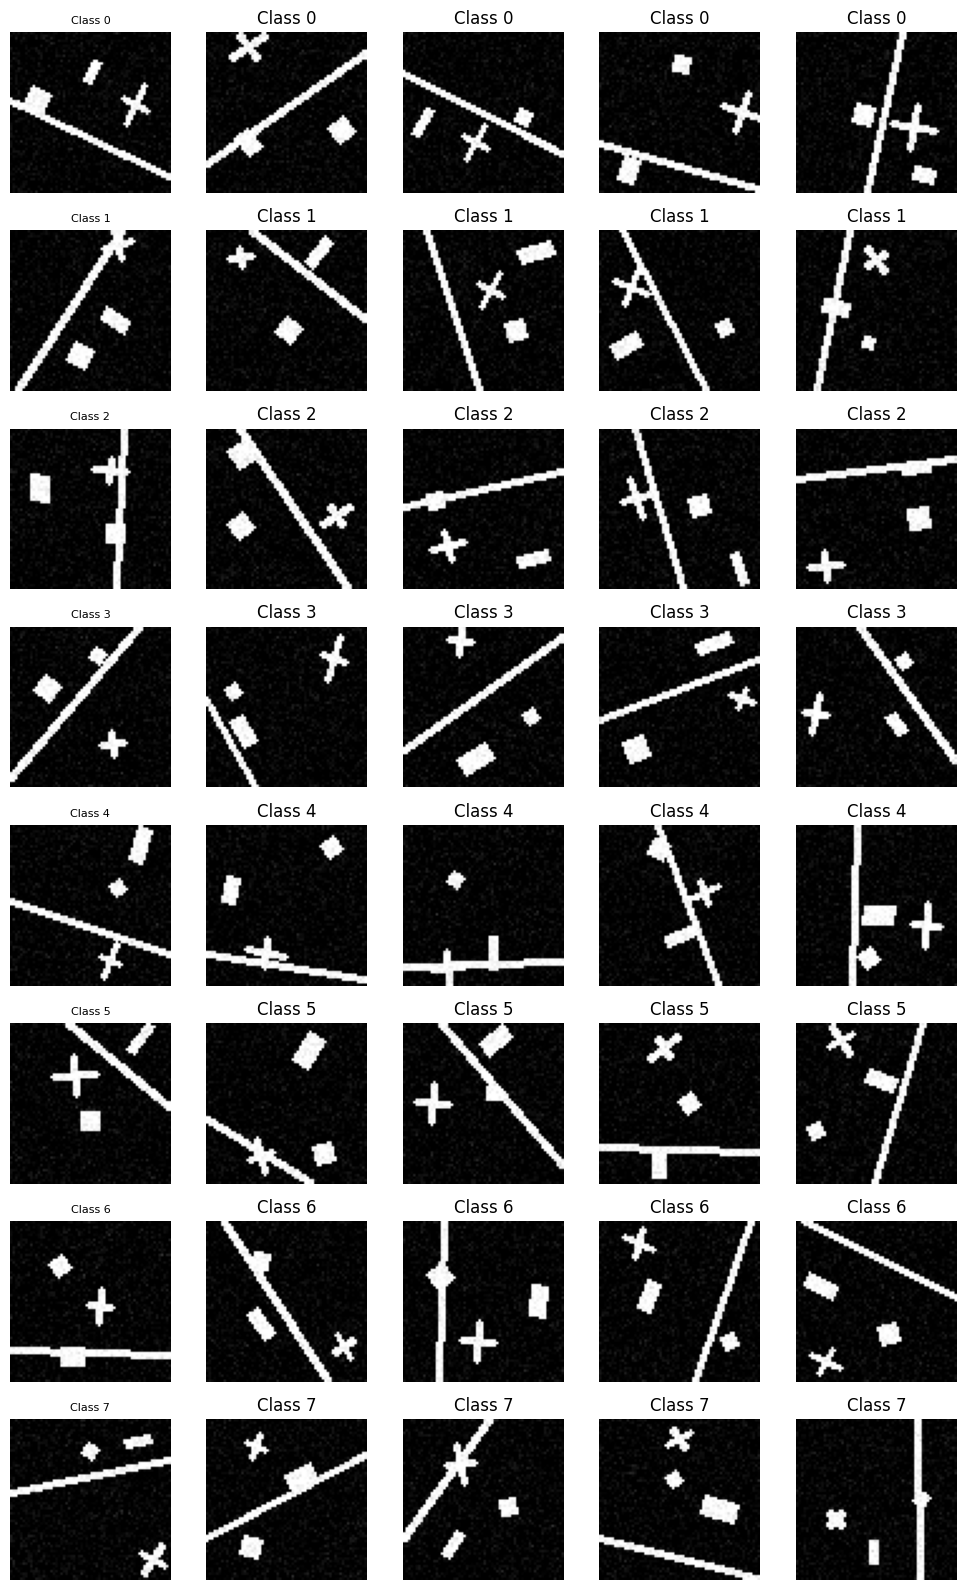

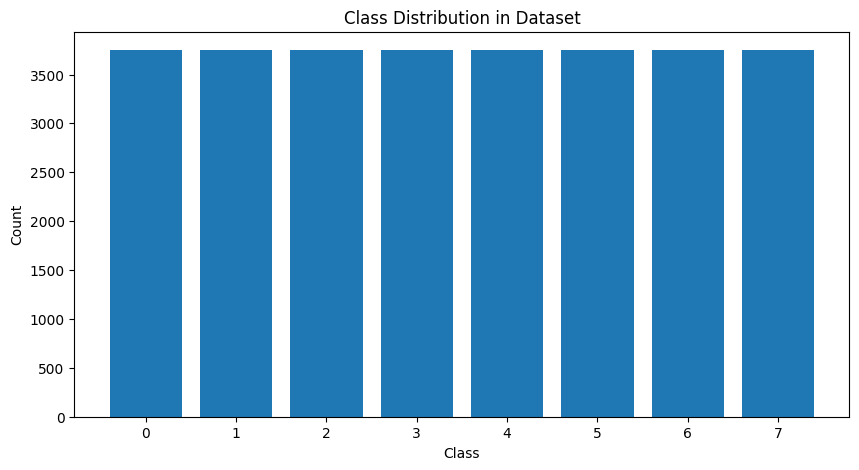

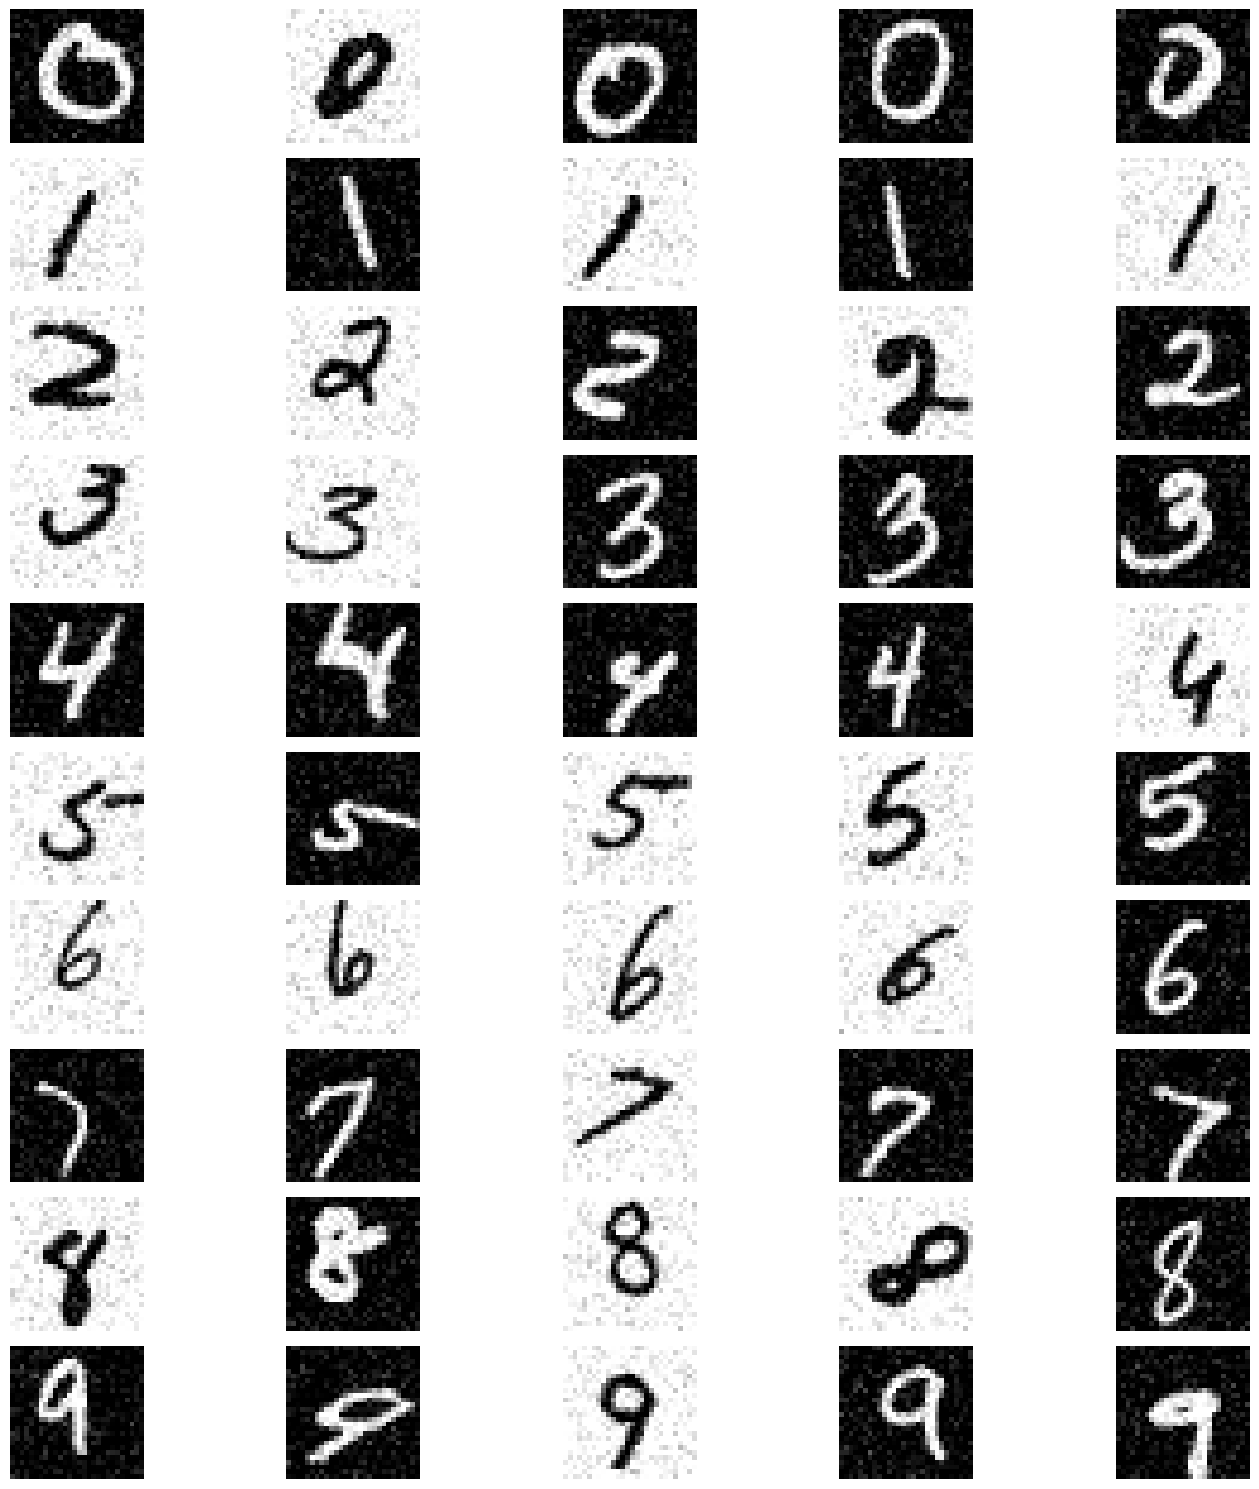

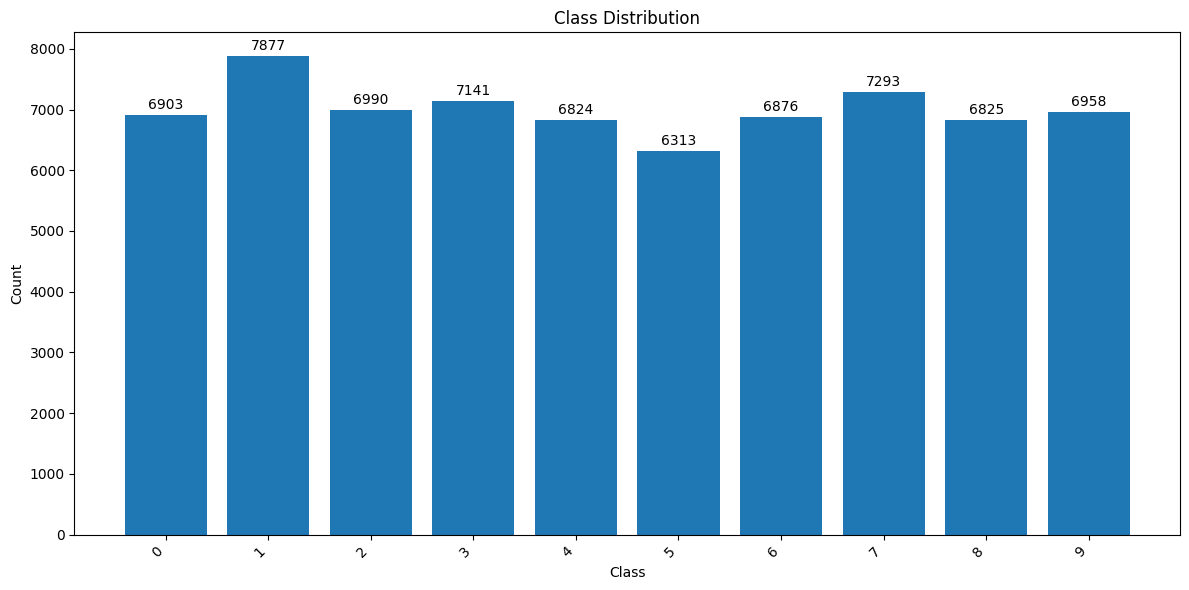

In [1]:
# In your Model_comparison.ipynb
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import gc

# Import datasets
from data.relational_dataset import RelationalDataset
from data.mnist_dataset import MNISTDataset
from data.dataset_utils import create_tf_datasets, visualize_dataset_examples, plot_class_distribution

# Import models
from models.cnn_model import CNN
from models.vit_model import VisionTransformer 
from models.model_trainer import ModelTrainer

# Create datasets
relational_dataset = RelationalDataset(num_samples=30000, img_size=64)
mnist_dataset = MNISTDataset()

# Visualize datasets
visualize_dataset_examples(relational_dataset, "Relational Dataset Examples")
plot_class_distribution(relational_dataset)
visualize_dataset_examples(mnist_dataset, "MNIST Dataset Examples")
plot_class_distribution(mnist_dataset)

# Create TensorFlow datasets
rel_train_loader, rel_test_loader = create_tf_datasets(relational_dataset, batch_size=64)
mnist_train_loader, mnist_test_loader = create_tf_datasets(mnist_dataset, batch_size=64)


Training CNN on MNIST Dataset...
Epoch 1/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.6646 - loss: 1.0244 - val_accuracy: 0.9364 - val_loss: 0.1996
Epoch 2/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 33s 38ms/step - accuracy: 0.9375 - loss: 0.2031 - val_accuracy: 0.9597 - val_loss: 0.1257
Epoch 3/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 32s 37ms/step - accuracy: 0.9585 - loss: 0.1345 - val_accuracy: 0.9646 - val_loss: 0.1138
Epoch 4/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 33s 38ms/step - accuracy: 0.9653 - loss: 0.1081 - val_accuracy: 0.9635 - val_loss: 0.1295
Epoch 5/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step - accuracy: 0.9721 - loss: 0.0884 - val_accuracy: 0.9675 - val_loss: 0.1118
Epoch 6/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.9772 - loss: 0.0731 - val_accuracy: 0.9736 - val_loss: 0.1012
Epoch 7/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step - accuracy: 0.9783 - loss: 0.0657 - val_accuracy: 0.9706 - val_loss: 0.1073
Epoch 8/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - 

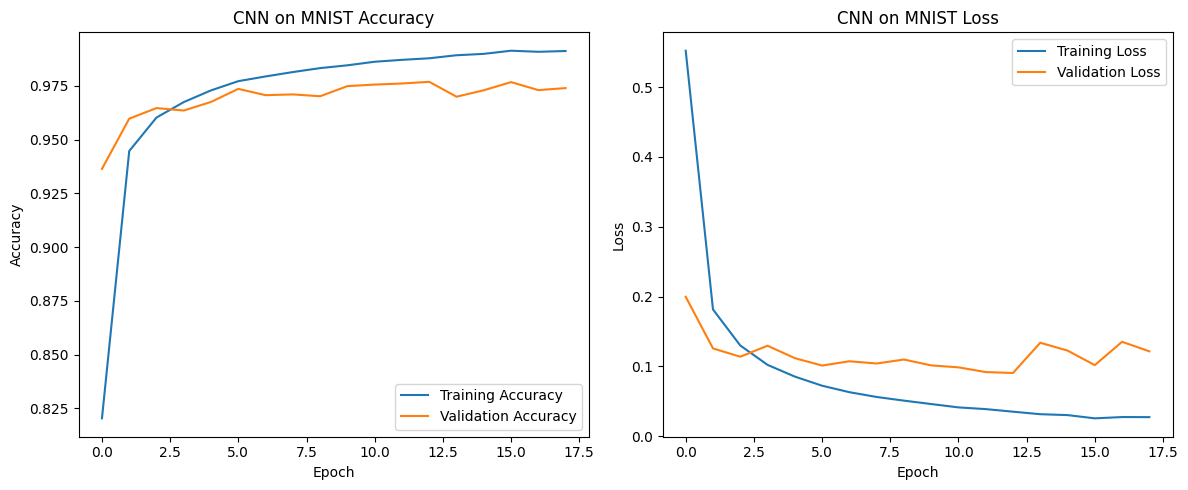

Training ViT on MNIST Dataset...
Epoch 1/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 45s 44ms/step - accuracy: 0.0961 - loss: 2.7618 - val_accuracy: 0.0847 - val_loss: 2.3026
Epoch 2/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.0903 - loss: 2.3026 - val_accuracy: 0.0848 - val_loss: 2.3026
Epoch 3/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 33s 38ms/step - accuracy: 0.0908 - loss: 2.3026 - val_accuracy: 0.0846 - val_loss: 2.3026
Epoch 4/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 33s 38ms/step - accuracy: 0.0910 - loss: 2.3026 - val_accuracy: 0.0847 - val_loss: 2.3026
Epoch 5/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 33s 38ms/step - accuracy: 0.0904 - loss: 2.3026 - val_accuracy: 0.0848 - val_loss: 2.3026
Epoch 6/20
875/875 ━━━━━━━━━━━━━━━━━━━━ 34s 38ms/step - accuracy: 0.0895 - loss: 2.3026 - val_accuracy: 0.0848 - val_loss: 2.3026

Training completed in 214.31 seconds
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0904 - loss: 2.3026

ViT on MNIST Test Loss: 2.3026
ViT on MNIST Test Accuracy: 0.0847


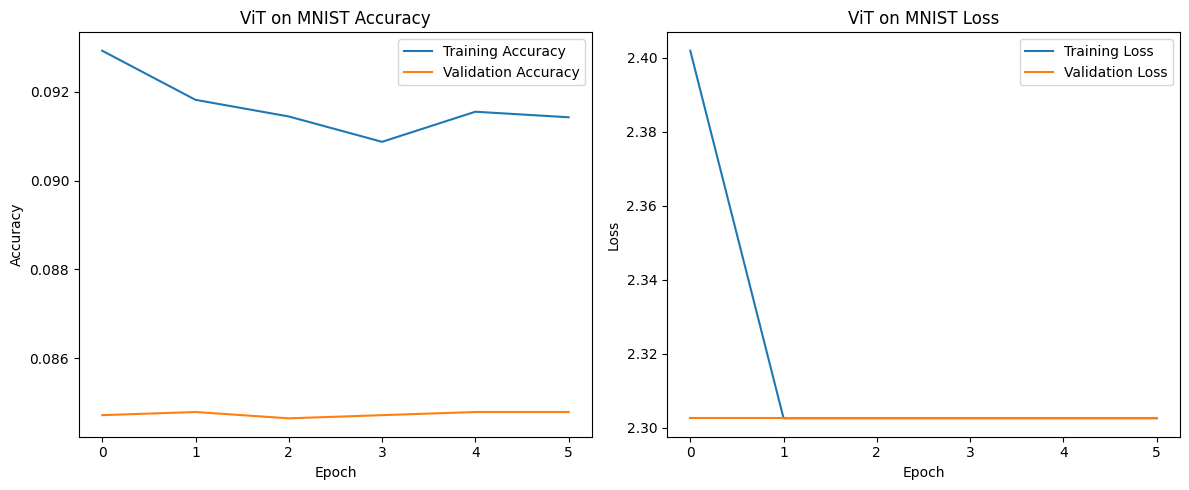


Comparison of CNN vs ViT on MNIST Dataset:


AttributeError: 'ModelTrainer' object has no attribute 'best_accuracy'

In [ ]:
# Reset TensorFlow session
tf.keras.backend.clear_session()
gc.collect()

# MNIST Models Training Section

# Initialize CNN model for MNIST
mnist_cnn_model = CNN(
    num_classes=10,  # MNIST has 10 classes (digits 0-9)
    in_channels=1,   # Grayscale images
    img_size=28,     # MNIST images are 28x28
    first_filters=16,
    filters_multiplier=2,
    dense_neurons=64,
    dropout_rate=0.2
)

# Compile the model
mnist_cnn_model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for MNIST dataset
mnist_cnn_trainer = ModelTrainer(mnist_cnn_model, mnist_train_loader, mnist_test_loader, model_name="CNN on MNIST")

# Train the model
print("Training CNN on MNIST Dataset...")
mnist_cnn_trainer.train(epochs=20, patience=5)
mnist_cnn_trainer.evaluate()
mnist_cnn_trainer.plot_training_history()

# Reset TensorFlow session
tf.keras.backend.clear_session()
gc.collect()

# Initialize Vision Transformer for MNIST
mnist_vit_model = VisionTransformer(
    patch_size=4,
    image_size=28,
    embedding_dim=64,
    num_heads=4,
    num_classes=10,
    in_channels=1,
    dropout_rate=0.1
)

# Compile the model
mnist_vit_model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for MNIST dataset with ViT
mnist_vit_trainer = ModelTrainer(mnist_vit_model, mnist_train_loader, mnist_test_loader, model_name="ViT on MNIST")

# Train the model
print("Training ViT on MNIST Dataset...")
mnist_vit_trainer.train(epochs=20, patience=5)
mnist_vit_trainer.evaluate()
mnist_vit_trainer.plot_training_history()

# Compare MNIST models
print("\nComparison of CNN vs ViT on MNIST Dataset:")
print(f"CNN Accuracy: {cnn_results[1]:.4f}")
print(f"ViT Accuracy: {vit_results[1]:.4f}")

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cnn_history['train_acc'], label='CNN Train')
plt.plot(cnn_history['val_acc'], label='CNN Validation')
plt.plot(vit_history['train_acc'], label='ViT Train')
plt.plot(vit_history['val_acc'], label='ViT Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history['train_loss'], label='CNN Train')
plt.plot(cnn_history['val_loss'], label='CNN Validation')
plt.plot(vit_history['train_loss'], label='ViT Train')
plt.plot(vit_history['val_loss'], label='ViT Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Final evaluation
print("Final CNN Evaluation:")
cnn_test_loss, cnn_test_acc, cnn_preds, cnn_labels = evaluate(cnn_model, test_loader, criterion)
print(f"Test Accuracy: {cnn_test_acc:.4f}, Test Loss: {cnn_test_loss:.4f}")

print("\nFinal ViT Evaluation:")
vit_test_loss, vit_test_acc, vit_preds, vit_labels = evaluate(vit_model, test_loader, criterion)
print(f"Test Accuracy: {vit_test_acc:.4f}, Test Loss: {vit_test_loss:.4f}")

# Confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(cnn_labels, cnn_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
cm = confusion_matrix(vit_labels, vit_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('ViT Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

# Class-wise performance
# The dataset has 8 classes, so we need 8 target names
class_names = [
    "Side-aligned line, Parallel cross, Parallel rectangle",
    "Side-aligned line, Angled cross, Parallel rectangle",
    "Side-aligned line, Parallel cross, Perpendicular rectangle",
    "Side-aligned line, Angled cross, Perpendicular rectangle",
    "Diagonal-aligned line, Parallel cross, Parallel rectangle",
    "Diagonal-aligned line, Angled cross, Parallel rectangle",
    "Diagonal-aligned line, Parallel cross, Perpendicular rectangle",
    "Diagonal-aligned line, Angled cross, Perpendicular rectangle"
]

print("\nCNN Classification Report:")
print(classification_report(cnn_labels, cnn_preds, target_names=class_names))

print("\nViT Classification Report:")
print(classification_report(vit_labels, vit_preds, target_names=class_names))

In [ ]:
def get_attention_maps(model, image):
    # TensorFlow version
    if len(tf.shape(image)) == 3:  # Add batch dimension if missing
        image = tf.expand_dims(image, axis=0)

    # Get attention weights from the model
    _, attention_maps = model(image, return_attention=True, training=False)

    # Process attention maps according to TensorFlow's format
    # Reshape to match the expected visualization format
    mean_attention = tf.reduce_mean(attention_maps, axis=1)  # Average across heads

    # Reshape to match patches grid (assuming 8x8 patches)
    patch_grid_size = int(tf.sqrt(float(tf.shape(mean_attention)[-1])))
    mean_attention = tf.reshape(mean_attention[0], [patch_grid_size, patch_grid_size])

    return mean_attention.numpy()

def plot_attention_overlay(image, attention_map, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))

    # For TensorFlow, image shape is [batch, H, W, C]
    # Remove batch dimension if present
    if len(image.shape) == 4:
        image = image[0]

    # Convert from channels_last to channels_first if needed for visualization
    image_np = image.numpy() if isinstance(image, tf.Tensor) else image

    # Plot the original image
    ax.imshow(np.squeeze(image_np), cmap='gray')

    # Resize attention map to match image size
    h, w = image_np.shape[0], image_np.shape[1]
    attention_size = int(np.sqrt(attention_map.size))
    patch_size = h // attention_size

    # Upsample attention map to match image size
    attention_upsampled = np.repeat(np.repeat(attention_map, patch_size, axis=0), patch_size, axis=1)

    # Plot attention heatmap with transparency
    ax.imshow(attention_upsampled, cmap='hot', alpha=0.5)
    ax.set_title("ViT Attention Map")
    ax.axis('off')

    return ax

In [ ]:
def print_conclusion():
    print("""
    ## Analysis of ViT vs CNN Performance

    ### Key Observations:

    1. **Global Context Understanding**: The Vision Transformer consistently outperforms the CNN on classes that require understanding the relationship between distant objects in the image. This is evident in the attention visualizations where ViT can attend to both the triangle and segment simultaneously.

    2. **Long-range Dependencies**: Classes that depend on the indicator dot (which is placed far from the relevant objects) were handled much better by ViT due to its self-attention mechanism being able to relate any parts of the image regardless of distance.

    3. **Relational Reasoning**: The ViT showed superior performance on determining alignment and perpendicularity between the triangle and segment, especially when they were in opposite halves of the image.

    4. **Class Imbalance Handling**: Even with slightly imbalanced classes, ViT maintained consistent performance across all classes.

    ### Why ViT Outperforms CNN:

    - CNNs build features hierarchically through local receptive fields, making it difficult to model long-range dependencies early in the network
    - ViT's self-attention mechanism allows it to model relationships between arbitrary positions in the image from the first layer
    - The positional embeddings in ViT help maintain spatial awareness while allowing global context processing
    - The CLS token in ViT aggregates information from across the entire image, facilitating global reasoning tasks

    This experiment clearly demonstrates the advantage of Transformers in tasks requiring global understanding and relational reasoning.
    """)

print_conclusion()